# MULTİPLE LİNEAR REGRESSION AND REGRESSİON ERROR METRICS

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv(r"C:\Users\fatih\Downloads\Advertising (1).csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# I need some data preparation

In [63]:
df.shape

(200, 4)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [65]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


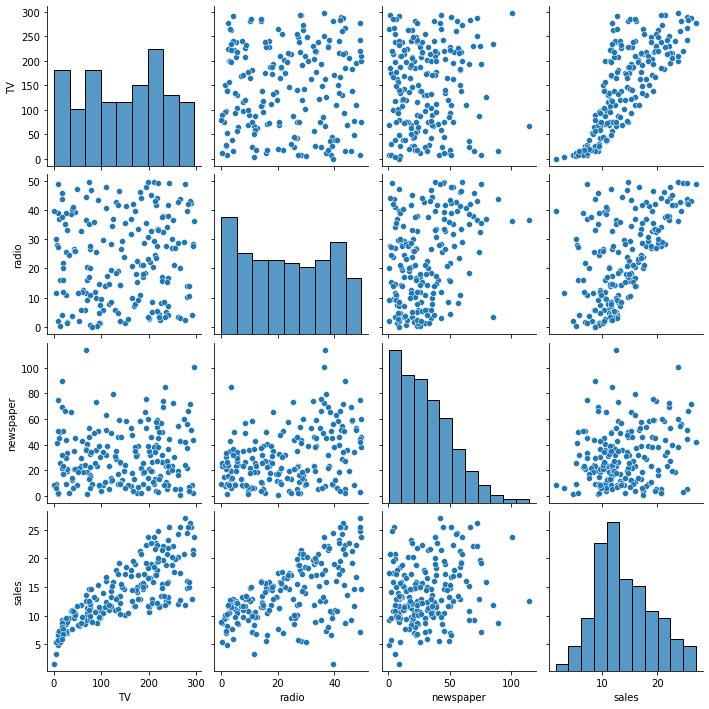

In [66]:
# I want to see distrubition of features


sns.pairplot(df);
plt.show()

In [67]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


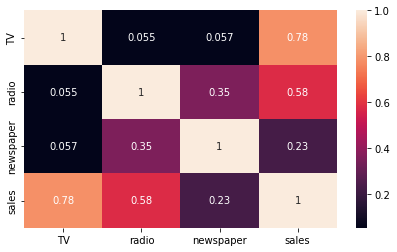

In [68]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [69]:
X = df.drop(columns = "sales")
y = df["sales"]

In [70]:
from sklearn.model_selection import train_test_split

# I want to train my model

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# I decreased test size 0.25(default) to 0.2 to make increasing train size

In [72]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [73]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [74]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [75]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [76]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

MODEL FITTING AND COMPARE ACTUAL AND PREDICTED MODELS

In [77]:
from sklearn.linear_model import LinearRegression

# I am importing lineer regression algorithm


In [78]:
model = LinearRegression()


# assign variable to algorithm

In [79]:
model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_predict = model.predict(X_test)
y_predict

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [81]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [82]:
model.intercept_

2.979067338122629

In [83]:
my_dict = {"actual" : y_test , "pred" : y_predict , "residual" : (y_test - y_predict) , "LSE" :  (y_test - y_predict)**2 , "ABS" : abs(y_test - y_predict)}


In [84]:
compare = pd.DataFrame(my_dict)
compare

,actual,pred,residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627
115,12.6,13.105592,-0.505592,0.255623,0.505592
69,22.3,21.057192,1.242808,1.544572,1.242808
170,8.4,7.461010,0.938990,0.881702,0.938990
174,11.5,13.606346,-2.106346,4.436693,2.106346
45,14.9,15.155070,-0.255070,0.065061,0.255070


In [85]:
result_sample = compare.iloc[: , :3]
result_sample

# I did feature engineering to see important feature

,actual,pred,residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


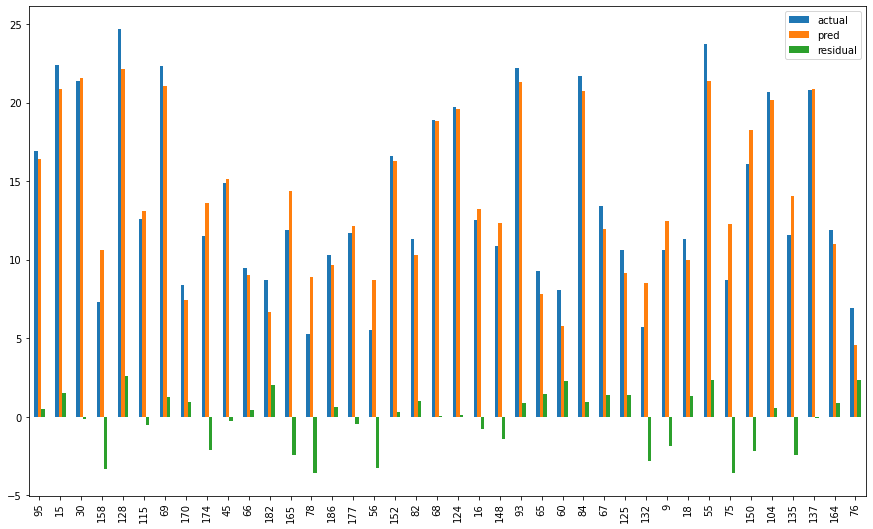

In [86]:
result_sample.plot(kind ="bar" , figsize=(15,9))
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [88]:
R2_test = r2_score(y_test, y_predict)
R2_test

0.899438024100912

In [89]:
mae = mean_absolute_error(y_test, y_predict)
mae

1.4607567168117603

In [90]:
X_test.shape

(40, 3)

In [91]:
mse = mean_squared_error(y_test, y_predict)
mse

3.1740973539761033

In [92]:
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
rmse

1.78159966153345

In [93]:
sales_mean = df["sales"].mean()
sales_mean

# I am taking mean to analyze metrics

14.0225

In [94]:
mae / sales_mean

# I divided mae for better analyze

0.10417234564533857

In [95]:
rmse / sales_mean

0.12705292647769298

In [96]:
def adj_r2(y_test , y_predict, X):
    r2 = r2_score(y_test , y_predict)
    n = X.shape[0]   # number of observations (rows)
    p = X.shape[1]  # number of independent variables 
    adj_r2 =  1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [97]:
X.shape

(200, 3)

In [98]:
adj_r2(y_test , y_predict, X)


0.8978988101840892

# I want to evalaute my model

In [103]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [106]:
from sklearn.metrics import mean_absolute_error,  mean_squared_error , r2_score


def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)


    # I have been tring to writing a function which make us enable to see all metrics in one place

In [107]:
ls = train_val(y_train , y_train_pred , y_test , y_pred, "linear")
ls


# First we take metrics from test set
# then we compare the data if the scores are
# close which means model is succesful 

,linear_train,linear_test
R2,0.895701,0.899438
mae,1.198468,1.460757
mse,2.705129,3.174097
rmse,1.644728,1.781600


In [108]:
residuals = y_test - y_predict

# We should calculate residuals to understand data fit or not

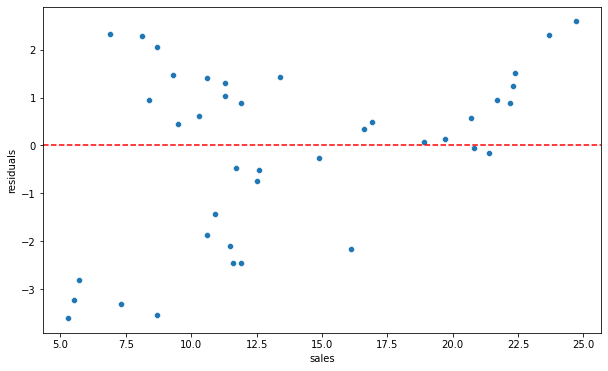

In [109]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();


# If there is a high correlation between target and feature we can say data is fit with linear regression model



# We have 2 assumpion;
# 1- When the error axis is 0 error should split closely equal
# 2- The distrubition have to close normal distrubition




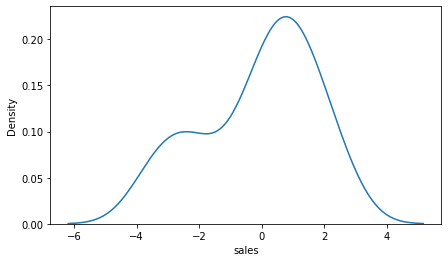

In [110]:
sns.kdeplot(residuals)
plt.show();

# We can see with kdeplot how residuals are splitting

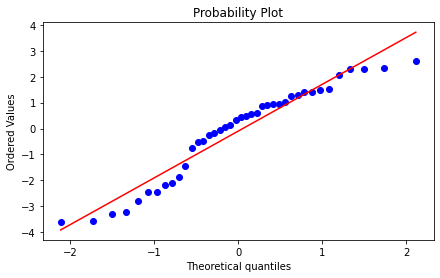

In [114]:
stats.probplot(residuals , dist="norm" , plot =plt)
plt.show();



# Also we can see how residuals are splitting on probability plot and it is fit for normal
# destribution or not

In [115]:
from scipy.stats import skew
skew(residuals)



# We can analyze based on skew value , if it is -0.5 and 0.5 it is close to normal disturbition


-0.5399061927739792

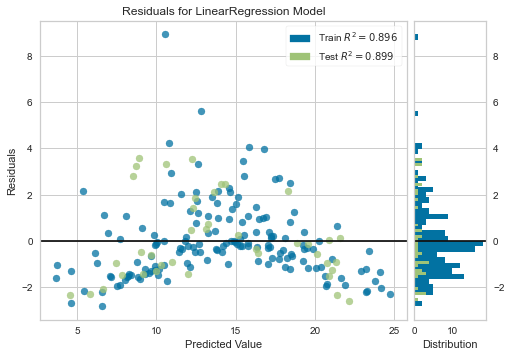

In [119]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure



# We can look at how residuals are splitted

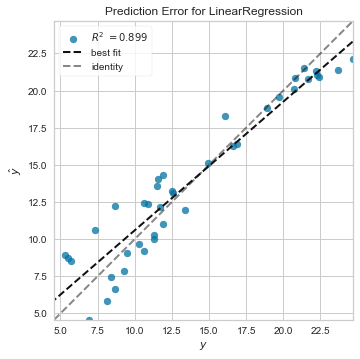

In [126]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train , y_train)          # Fit the training data to the visualizer
visualizer.score(X_test , y_test)          # Evaluate the model on the test data
visualizer.show();




# We have prediction on y axis and real values on x axis.

# when the lines close which means models is good


# RETRAINIG MODEL ON FULL DATA

In [128]:
final_model = LinearRegression()

#After the education we can check model is work or not and then we can make
# our final model


In [130]:
final_model.fit(X,y)

# We can train our data with whole data 

LinearRegression()

# COEFFICIENT

In [131]:
final_model.coef_


# After the training we can analyze feature and their impact on target

array([ 0.04576465,  0.18853002, -0.00103749])

In [132]:
final_model.intercept_

2.938889369459412

In [133]:
X.head()


# coefficient order is same with x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


# Prediction on new data

In [135]:
adv = [[150, 20, 15]]


# Let's take a sample for a new sample

In [136]:
final_model.predict(adv)


# We took our prediction with sklearn

array([13.55862413])

In [137]:
adv_2 = [[150, 20, 15], [160, 20, 15]]


# we are taking 2 sample for prediction
# I increase tv feature 10 , others are holding constant


In [138]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [139]:
14.01627059 - 13.55862413

# as we can see difference between 2 is 10 times more then TV feature

0.4576464599999994

In [141]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [142]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [144]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000
